### Libaries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Load Data

In [2]:
path = r'/content/student_info.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
df.shape

(200, 2)

### Data Visulization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [7]:
x = df.study_hours
y = df.student_marks

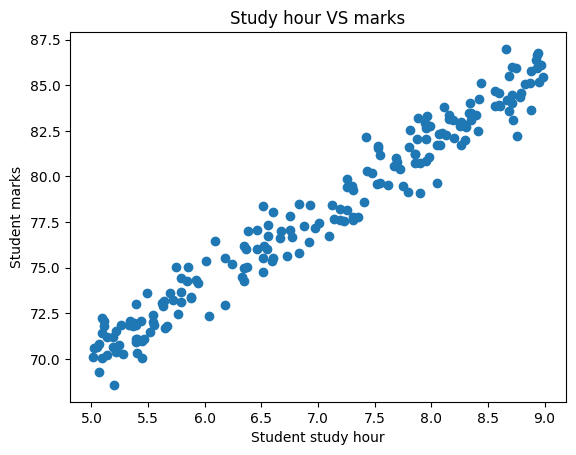

In [8]:
plt.scatter(x, y)
plt.xlabel('Student study hour')
plt.ylabel('Student marks')
plt.title('Study hour VS marks')
plt.show()

### Data Cleaning

In [9]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [10]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [11]:
df2 = df.fillna(df.mean())

In [12]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [13]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


### Split Dataset

In [14]:
X = df2.drop('student_marks', axis = 'columns')
y = df2.drop('study_hours', axis = 'columns')
print('X shape is:', X.shape)
print('Y shape is:', y.shape)

X shape is: (200, 1)
Y shape is: (200, 1)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('The shape of X train:', X_train.shape)
print('The shape of Y train:', y_train.shape)
print('The shape of X test:', X_test.shape)
print('The shape of Y train:', y_test.shape)

The shape of X train: (160, 1)
The shape of Y train: (160, 1)
The shape of X test: (40, 1)
The shape of Y train: (40, 1)


### Training the model

y = m * x + c

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [17]:
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
lr.coef_

array([[3.93037294]])

In [19]:
lr.intercept_

array([50.45063632])

In [20]:
y_pred = lr.predict(X_test)
y_pred

array([[83.50507271],
       [70.84927186],
       [72.93236952],
       [85.35234799],
       [73.20749562],
       [84.48766595],
       [80.12495199],
       [81.85431608],
       [80.91102657],
       [82.20804964],
       [78.98514384],
       [84.84139951],
       [77.84533568],
       [77.68812077],
       [83.22994661],
       [85.78468901],
       [84.9593107 ],
       [72.61793968],
       [78.71001773],
       [79.18166248],
       [84.2911473 ],
       [85.6274741 ],
       [74.74034107],
       [81.3433676 ],
       [72.02838374],
       [80.40007809],
       [78.98514384],
       [82.09013845],
       [77.94732382],
       [82.24735337],
       [75.44780819],
       [84.60557713],
       [71.63534645],
       [75.48711192],
       [70.29901965],
       [78.98514384],
       [75.32989701],
       [84.52696967],
       [74.07217767],
       [71.4388278 ]])

In [21]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ['Study_hours', 'Student_marks_original', 'Student_marks_predicted'])

,Study_hours,Student_marks_original,Student_marks_predicted
0,8.410000,82.50,83.505073
1,5.190000,71.18,70.849272
2,5.720000,73.25,72.932370
3,8.880000,83.64,85.352348
4,5.790000,73.64,73.207496
5,8.660000,86.99,84.487666
6,7.550000,81.18,80.124952
7,7.990000,82.75,81.854316
8,7.750000,79.50,80.911027
9,8.080000,81.70,82.208050


### Accuracy

In [22]:
lr.score(X_test, y_test)

0.9521841793508594

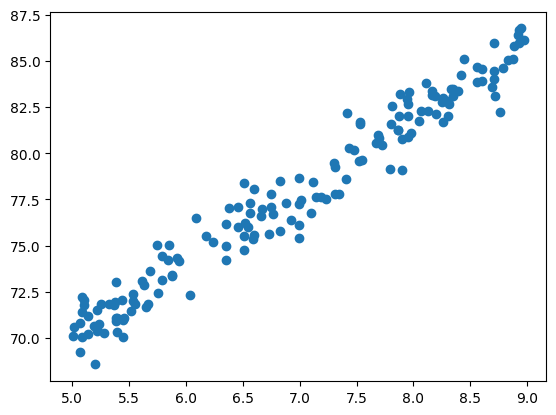

In [23]:
plt.scatter(X_train, y_train)
plt.show()

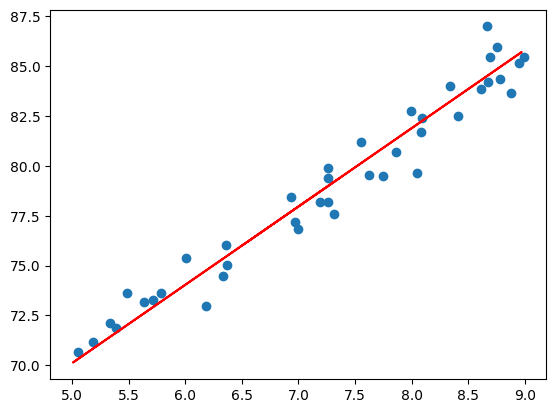

In [24]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = 'r')
plt.show()